### cMCS Computation

Purpose: find knockout sets for generating growth-coupled strain designs via MCS

*NOTE:*

- *cMCS is computed for each carbon source and threshold using the same steps as shown in this notebook. Below is an example for MR at 1% biomass and 1% act*

- *steps below are modified from the tutorials for StrainDesign provided at https://github.com/klamt-lab/straindesign*



Last Updated: Parsa Nayyara (01.02.24)

In [1]:
import cobra
import straindesign as sd

import cobra.test
import os
from os.path import join

data_dir = cobra.test.data_dir

from __future__ import print_function

from cobra import Model, Reaction, Metabolite

In [3]:
model = cobra.io.read_sbml_model(join(data_dir, modelfilepath))
model.solver = "cplex"

In [4]:
# change bounds according to M9 minimal media in Nogales et al. 2020

cobra.Reaction("EX_ca2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_co2_e", lower_bound = -100, upper_bound = 1000.0)
cobra.Reaction("EX_cobalt2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_cu2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_cl_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_fe2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_glc__D_e", lower_bound = -6.3, upper_bound = 1000.0)
cobra.Reaction("EX_h2o_e", lower_bound = -100, upper_bound = 1000.0)
cobra.Reaction("EX_h_e", lower_bound = -100, upper_bound = 1000.0)
cobra.Reaction("EX_hco3_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_k_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_mg2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_mn2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_mobd_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_nh4_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_ni2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_o2_e", lower_bound = -30, upper_bound = 1000.0)
cobra.Reaction("EX_pi_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_sel_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_so4_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_tungs_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_zn2_e", lower_bound = -10, upper_bound = 1000.0)
cobra.Reaction("EX_MR", lower_bound = -1000, upper_bound = 1000.0)

medium = model.medium
medium["EX_acmtsoxin_e"] = 0.0
medium["EX_acpptrn_e"] = 0.0
medium["EX_d2one_e"] = 0.0
medium["EX_d3one_e"] = 0.0
medium["EX_d4one_e"] = 0.0
medium["EX_mtsoxin_e"] = 0.0
medium["EX_n2one_e"] = 0.0
medium["EX_pptrn_e"] = 0.0
medium["EX_und2one_e"] = 0.0
medium["EX_gACT[e]"] = 0.0
medium["EX_nh4_e"] = 10.0
medium["EX_o2_e"] = 30.0

# change carbon source
medium["EX_MR"] = 1000
medium["EX_glc__D_e"] = 0.0

model.medium = medium

model.medium

{'EX_ca2_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_co2_e': 100.0,
 'EX_cobalt2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_h2o_e': 100.0,
 'EX_h_e': 100.0,
 'EX_hco3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_mobd_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_o2_e': 30.0,
 'EX_pi_e': 10.0,
 'EX_sel_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_tungs_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_MR': 1000}

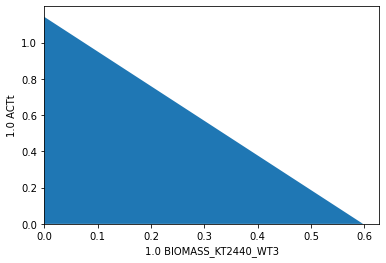

In [5]:
# plot initial flux space 

sd.plot_flux_space(model, ('BIOMASS_KT2440_WT3',('ACTt')));

In [6]:
# set desired and target regions based on the thresholds we want to investigate

min_objective = 0.01142058151 # target region (min ACTt) ex. 1% max
min_growth = 0.00597624744 # desired region (min biomass) ex. 1% max

module_suppress = sd.SDModule(model,sd.names.SUPPRESS,constraints=f'ACTt <= {min_objective}')
module_protect  = sd.SDModule(model,sd.names.PROTECT, constraints=f'BIOMASS_KT2440_WT3>={min_growth}')

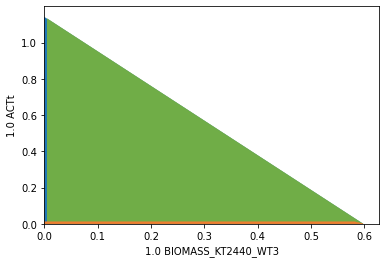

In [7]:
# make plots

import matplotlib.pyplot as plt

# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_KT2440_WT3',('ACTt')),
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(model,
                                               (f'BIOMASS_KT2440_WT3',('ACTt')),
                                               constraints=f'BIOMASS_KT2440_WT3 >= {min_growth}',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')

# growth-coupled design plot
_,          _,      plot3 = sd.plot_flux_space(model,
                                               ('BIOMASS_KT2440_WT3',('ACTt')),
                                               constraints=f'ACTt <= {min_objective}',
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

In [8]:
import logging
logging.basicConfig(level=logging.INFO)

# define reactions that are allowed to be knocked out (only reactions in the ko_cost/gko_cost dict are considered knockout candidates)
reducedmodel = cobra.io.read_sbml_model(join(data_dir, reducedmodelpath)) 
#an error would be raised because the reduced model does not have an objective function
#but reduced model is only used to provide a list of knockout candidates, not for optimization,
#hence the error should not affect cMCS computations.

ko_cost = {r.id:1 for r in reducedmodel.reactions}
ko_cost["EX_o2_e"] = 1 # allow knockout of O2 uptake
gko_cost = {g.id:1 for g in reducedmodel.genes}

ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


In [9]:
# Compute strain designs
sols = sd.compute_strain_designs(model,
                                 sd_modules = [module_suppress, module_protect],
                                 max_solutions = 50,
                                 ko_cost = ko_cost,
                                 gko_cost = gko_cost,
                                 time_limit = 300,
                                 solution_approach = sd.names.ANY)
# Print solutions
print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
      f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
print(f"Example intervention set: {['+'+s if v>0 else s for s,v in sols.reaction_sd[0].items() if v!=0]}")

INFO:root:Preparing strain design computation.
INFO:root:  Using cplex for solving LPs during preprocessing.
INFO:root:  FVA to identify blocked reactions and irreversibilities.
INFO:root:  FVA(s) to identify essential reactions.
INFO:root:Preprocessing GPR rules (1490 genes, 2126 gpr rules).
INFO:root:  Simplifyied to 1125 genes and 1604 gpr rules.
INFO:root:  Extending metabolic network with gpr associations.
INFO:root:Compressing Network (5178 reactions).
INFO:root:  Removing blocked reactions.
INFO:root:  Translating stoichiometric coefficients to rationals.
INFO:root:  Removing conservation relations.
INFO:root:  Compression 1: Applying compression from EFM-tool module.
INFO:root:  Reduced to 2563 reactions.
INFO:root:  Compression 2: Lumping parallel reactions.
INFO:root:  Reduced to 2424 reactions.
INFO:root:  Compression 3: Applying compression from EFM-tool module.
INFO:root:  Reduced to 2302 reactions.
INFO:root:  Compression 4: Lumping parallel reactions.
INFO:root:  Reduced

One compressed solution with cost 11.0 found and expanded to 64 solutions in the uncompressed netork.
Example intervention set: ['CAT', 'MDH2', 'NACODA', 'ACALD', 'ACONTa', 'SUCD4', 'ME2', 'TALA', 'FDH', 'MDH']


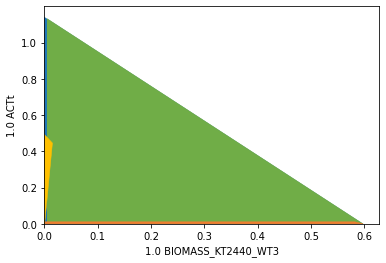

In [10]:
# plot production envelope of suggested strain design

import matplotlib.pyplot as plt
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_KT2440_WT3',('ACTt')),
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(model,
                                               (f'BIOMASS_KT2440_WT3',('ACTt')),
                                               constraints=f'BIOMASS_KT2440_WT3 >= {min_growth}',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')
# pGCP design plot
_,          _,      plot3 = sd.plot_flux_space(model,
                                               ('BIOMASS_KT2440_WT3',('ACTt')),
                                               constraints=f'ACTt <= {min_objective}',
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# plotting designed strain
interventions = [[{s:1.0},'=',0.0] for s,v in sols.reaction_sd[0].items() if v < 1]
_,          _,      plot4 = sd.plot_flux_space(model,
                                               ('BIOMASS_KT2440_WT3',('ACTt')),
                                               constraints=interventions,
                                               show=False);
plot4.set_facecolor('#FFC000')
plot4.set_edgecolor('#FFC000')
# adjust axes limits and show plot
plot4.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot4.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()